In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import os
from collections import defaultdict
import cv2
import ast

%matplotlib inline

## Train.csv

In [3]:
raw_data_path = Path('/Users/Shrinikesh/Documents/personal-projects/kaggle/ranzcr_clip/data/raw')
raw_image_data_path = Path('/Users/Shrinikesh/Documents/personal-projects/kaggle/ranzcr_clip/data/raw/train')
train_data_path = raw_data_path / 'train.csv'

In [4]:
train_df = pd.read_csv(train_data_path).set_index('StudyInstanceUID')
train_df.head()

,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
StudyInstanceUID,,,,,,,,,,,,
1.2.826.0.1.3680043.8.498.26697628953273228189375557799582420561,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1.2.826.0.1.3680043.8.498.46302891597398758759818628675365157729,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
1.2.826.0.1.3680043.8.498.23819260719748494858948050424870692577,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
1.2.826.0.1.3680043.8.498.68286643202323212801283518367144358744,0,0,0,0,0,0,0,1,0,0,0,c31019814
1.2.826.0.1.3680043.8.498.10050203009225938259119000528814762175,0,0,0,0,0,0,0,0,0,1,0,207685cd1


### Basic properties of the dataset

In [5]:
train_df.shape

(30083, 12)

In [6]:
train_df['Swan Ganz Catheter Present'].value_counts()

0    29253
1      830
Name: Swan Ganz Catheter Present, dtype: int64

In [7]:
len(train_df['PatientID'].unique())

3255

In [8]:
train_df.loc[train_df['ETT - Normal']==1]

,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
StudyInstanceUID,,,,,,,,,,,,
1.2.826.0.1.3680043.8.498.46302891597398758759818628675365157729,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
1.2.826.0.1.3680043.8.498.11707076266253086830850990314496191758,0,0,1,0,0,0,1,0,0,1,0,8260896cf
1.2.826.0.1.3680043.8.498.17332833449968516367349904809269946843,0,0,1,0,0,0,1,0,1,0,0,27413587b
1.2.826.0.1.3680043.8.498.21553435248897151659092231631371824902,0,0,1,1,0,0,1,0,0,1,0,00f261590
1.2.826.0.1.3680043.8.498.10129559062963528496643969105849375477,0,0,1,0,0,0,1,1,0,0,0,9ebe3d714
...,...,...,...,...,...,...,...,...,...,...,...,...
1.2.826.0.1.3680043.8.498.98624384591890799789137007864255068006,0,0,1,0,0,1,0,1,0,1,0,5733c2458
1.2.826.0.1.3680043.8.498.67810475638153448553533618534413783631,0,0,1,0,0,0,1,0,0,0,0,bc1d59b76
1.2.826.0.1.3680043.8.498.74257566841157531124733571365206980234,0,0,1,0,0,0,0,0,1,1,0,5b5b9ac30


#### Basic properties summary:
- There are 30083 unique images in the training set
- There are only 3255 unique patients in the dataset

- Breakdown of different categories:
    - Total number of images with ETT: 8457
        - ETT - Abnormal: 79
        - ETT - Borderline: 1138
        - ETT - Normal: 7240
    - Total number of images with NGT: 8353
        - NGT - Abnormal: 279
        - NGT - Borderline: 529
        - NGT - Incompletely Imaged: 2748
        - NGT - Normal: 4797
    - Total number of images with CVC: 20414
        - CVC - Abnormal: 3195
        - CVC - Borderline: 8460
        - CVC - Normal: 8759
    - Swan Ganz Catheter Present: 830
    


### Influence of patientID

#### Number of records per patient

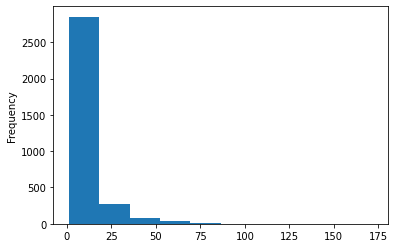

In [9]:
train_df.groupby(['PatientID']).size().plot.hist()

In [10]:
train_df.groupby(['PatientID']).size().describe()

count    3255.000000
mean        9.242089
std        12.624028
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max       172.000000
dtype: float64

## Train_annotations.csv

In [11]:
train_annotations_data_path = raw_data_path / 'train_annotations.csv'

In [12]:
train_annotations_df = pd.read_csv(train_annotations_data_path)
train_annotations_df.head()

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


### Basic properties of the dataset

In [13]:
train_annotations_df.shape

(17999, 3)

In [14]:
len(train_annotations_df.StudyInstanceUID.unique())

9095

In [15]:
train_annotations_df.groupby(['label']).size()

label
CVC - Abnormal                1206
CVC - Borderline              2986
CVC - Normal                  7437
ETT - Abnormal                  30
ETT - Borderline               428
ETT - Normal                  2536
NGT - Abnormal                 111
NGT - Borderline               219
NGT - Incompletely Imaged     1019
NGT - Normal                  1870
Swan Ganz Catheter Present     157
dtype: int64

##### What are the pairs of values in the data column?

In [16]:
from keras.preprocessing import image

Using TensorFlow backend.


In [17]:
img_to_fnames = {fname.rsplit(".", 1)[0] : os.path.join(raw_image_data_path, fname) for fname in os.listdir(raw_image_data_path)}

In [30]:
img_index = 3

img_ID = train_annotations_df.iloc[img_index]['StudyInstanceUID']
img_filepath = img_to_fnames[img_ID]
img = image.load_img(img_filepath)
img_as_array = image.img_to_array(img)

pts = np.array(ast.literal_eval(train_annotations_df.iloc[img_index]['data']), np.int32)
pts = pts.reshape((-1,1,2))
img_as_array = cv2.polylines(img_as_array,[pts],False,(0,255,255), 2)


In [31]:
image.array_to_img(img_as_array).show()

In [19]:
train_annotations_df.iloc[img_index]['data']

'[[1487, 1279], [1477, 1168], [1472, 1052], [1464, 924], [1453, 827], [1443, 755], [1434, 640], [1404, 514], [1387, 497], [1360, 541], [1290, 617], [1228, 696], [1179, 776], [1116, 880], [1065, 963], [1031, 999]]'

#### Basic properties of train_annotations.csv summary
- Total of 17999 annotation records
- These 17999 annotations have been made on a total of 9095 unique images
- We have annotation data for each of the 11 classes (albeit in different proportions - see above)
- Basically, for each label, there is annotation data about what part of the picture (polyline) was used to give that label by a doctor

## The Images themselves

##### Checking dimensions of images

In [20]:
from PIL import Image as pil_image

In [21]:
image_sizes_count = defaultdict(int)

In [22]:
# for img, path in img_to_fnames.items():
#     loaded_img = pil_image.open(path)
#     img_size = loaded_img.size
#     image_sizes_count[img_size]=image_sizes_count[img_size] + 1


# img = pil_image.open(img_to_fnames['1.2.826.0.1.3680043.8.498.16451034714945708059993280774682419855'])
# print(img.size)

In [23]:
len(image_sizes_count.keys())

0

#### Properties
- They are in various sizes - total of 1650 image dimensions + who knows what other dimensions are in test set
- Means that there is no standard image dimension for the Xrays